# Lab 2 - Genetic Drift Intro

In the last lab we were simulating a population growing. In this lab, we'll assume the population has grown to its *carrying capacity* (i.e., the population is full). Then we're randomly sampling from the current generation which organisms are going to reproduce and make up the next generation. This is like the blue and orange circles from Thursday's lecture! 

### Like before, we need to import our favorite libraries

In [4]:
import numpy as np
from matplotlib import pyplot as plt

### We can create a few variables to help us
`pop_size` will be the number of individuals in our population once it's reached the [carrying capacity](https://en.wikipedia.org/wiki/Carrying_capacity). 

`num_mutants` will be how many individuals in our population are the mutants that we want to keep track of. 

`population` will be the array of individuals (0s or 1s like before). Here I'm using a handy NumPy function `zeros` that gives me back an array of a specified size (and dimension -- but more on this later) full of zeros. There is also a similar function, `ones` that does exactly what it sounds like! 

In [67]:
pop_size = 20
num_mutants = 5

population = np.zeros(pop_size)
print(population)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### We want to add in our mutants to the population before we get started ticking through generations
It doesn't really matter where they are in our population list, so let's just put them in the front. 

Remember that the ***wild type*** organism is a 0, and the ***mutant*** is a 1 in our simulation.

In [68]:
for i in range(num_mutants):
    population[i] = 1
    
print(population)

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Okay, now we have our initial population all set up!
Let's write a little helper function that tells us the frequency of the mutant in our population -- this should look familiar!

In [69]:
def mutant_freq(a_population):
    return sum(a_population)/len(a_population)

In [70]:
mutant_freq(population)

0.25

### Let's look at NumPy's `random.choice()` function
[Here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) is a link to the full documentation. There, you'll see that it's *signature* is: `random.choice(a, size=None, replace=True, p=None)`

So, it expects an array (`a`) in the first position, and then has some optional named arguments:
- `size` tells NumPy the number (and dimension) of the returned sample
- `replace` is a boolean that dictates if sampling is done with replacement or not
- `p` is a probability vector that gives a weight to each element in the array -- this might come in handy later!

Let's play with this function a bit

In [71]:
np.random.choice(population, size=2)

array([0., 0.])

In [72]:
np.random.choice(population, size=2)

array([0., 0.])

In [73]:
np.random.choice(population, size=100)

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])

In [74]:
mutant_freq(np.random.choice(population, size=100))

0.24

### That's pretty close to the 0.5 we started with! 

Let's do this a bunch of times and look at the distribution of mutation frequencies.

### First, let's look at a sample of 100 individuals from our population
Now, the population only has 20 individuals, but that's okay because we're sampling with replacement! 

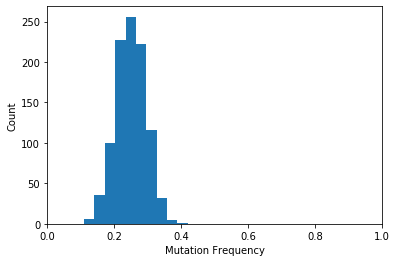

In [75]:
mutaant_frequency_samples = [mutant_freq(np.random.choice(population, size=100)) for i in range(1000)]
plt.hist(mutaant_frequency_samples)
plt.xlabel("Mutation Frequency")
plt.ylabel("Count")
plt.xlim(0,1)
plt.show()

### Next, let's look at a sample of *1000* individuals from our population
Make sure you notice what exactly we're changing here! 

We haven't changed the number of populations we're sampling, but we have changed how *big* each population is! Why does that have such a large effect on the variation around our mutant frequency? 

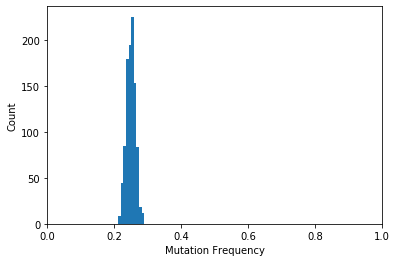

In [76]:
mutaant_frequency_samples = [mutant_freq(np.random.choice(population, size=1000)) for i in range(1000)]
plt.hist(mutaant_frequency_samples)
plt.xlabel("Mutation Frequency")
plt.ylabel("Count")
plt.xlim(0,1)
plt.show()

# Now let's simulate some drift!

In [89]:
#Just a reminder
pop_size = 20
num_mutants = 5

population = np.zeros(pop_size)

for i in range(num_mutants):
    population[i] = 1
    
print(population)
print(mutant_freq(population))

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.25


In [90]:
num_generations = 10

for gen in range(num_generations):
    population = np.random.choice(population, pop_size)
    print("Generation: {0}, MutFreq: {1}".format(gen+1, mutant_freq(population)))

Generation: 1, MutFreq: 0.25
Generation: 2, MutFreq: 0.4
Generation: 3, MutFreq: 0.3
Generation: 4, MutFreq: 0.4
Generation: 5, MutFreq: 0.45
Generation: 6, MutFreq: 0.4
Generation: 7, MutFreq: 0.35
Generation: 8, MutFreq: 0.3
Generation: 9, MutFreq: 0.25
Generation: 10, MutFreq: 0.3


## Let's keep track of the mutant frequency over time so we can plot it!

In [95]:
# Putting everything together...

pop_size = 20
num_mutants = 5
num_generations = 10

mutation_frequency_list = []
population = np.zeros(pop_size)

for i in range(num_mutants):
    population[i] = 1

#Let's be sure to record the frequency at the beginning of time!
mutation_frequency_list.append(mutant_freq(population))

for gen in range(num_generations):
    population = np.random.choice(population, pop_size)
    print("Generation: {0}, MutFreq: {1}".format(gen+1, mutant_freq(population)))
    mutation_frequency_list.append(mutant_freq(population))

Generation: 1, MutFreq: 0.25
Generation: 2, MutFreq: 0.4
Generation: 3, MutFreq: 0.25
Generation: 4, MutFreq: 0.2
Generation: 5, MutFreq: 0.1
Generation: 6, MutFreq: 0.05
Generation: 7, MutFreq: 0.05
Generation: 8, MutFreq: 0.0
Generation: 9, MutFreq: 0.0
Generation: 10, MutFreq: 0.0


In [96]:
mutation_frequency_list

[0.25, 0.25, 0.4, 0.25, 0.2, 0.1, 0.05, 0.05, 0.0, 0.0, 0.0]

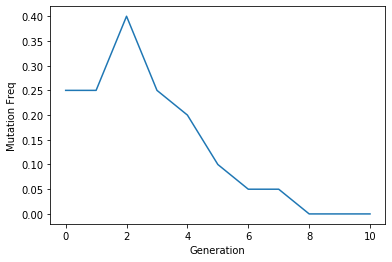

In [97]:
plt.plot(mutation_frequency_list)
plt.ylabel("Mutation Freq")
plt.xlabel("Generation")
plt.show()

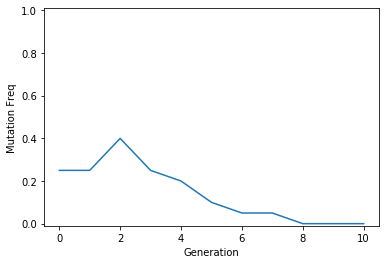

In [99]:
plt.plot(mutation_frequency_list)
plt.ylabel("Mutation Freq")
plt.xlabel("Generation")
plt.ylim(-0.01, 1.01)
plt.show()